Found 24 binocular images in train set


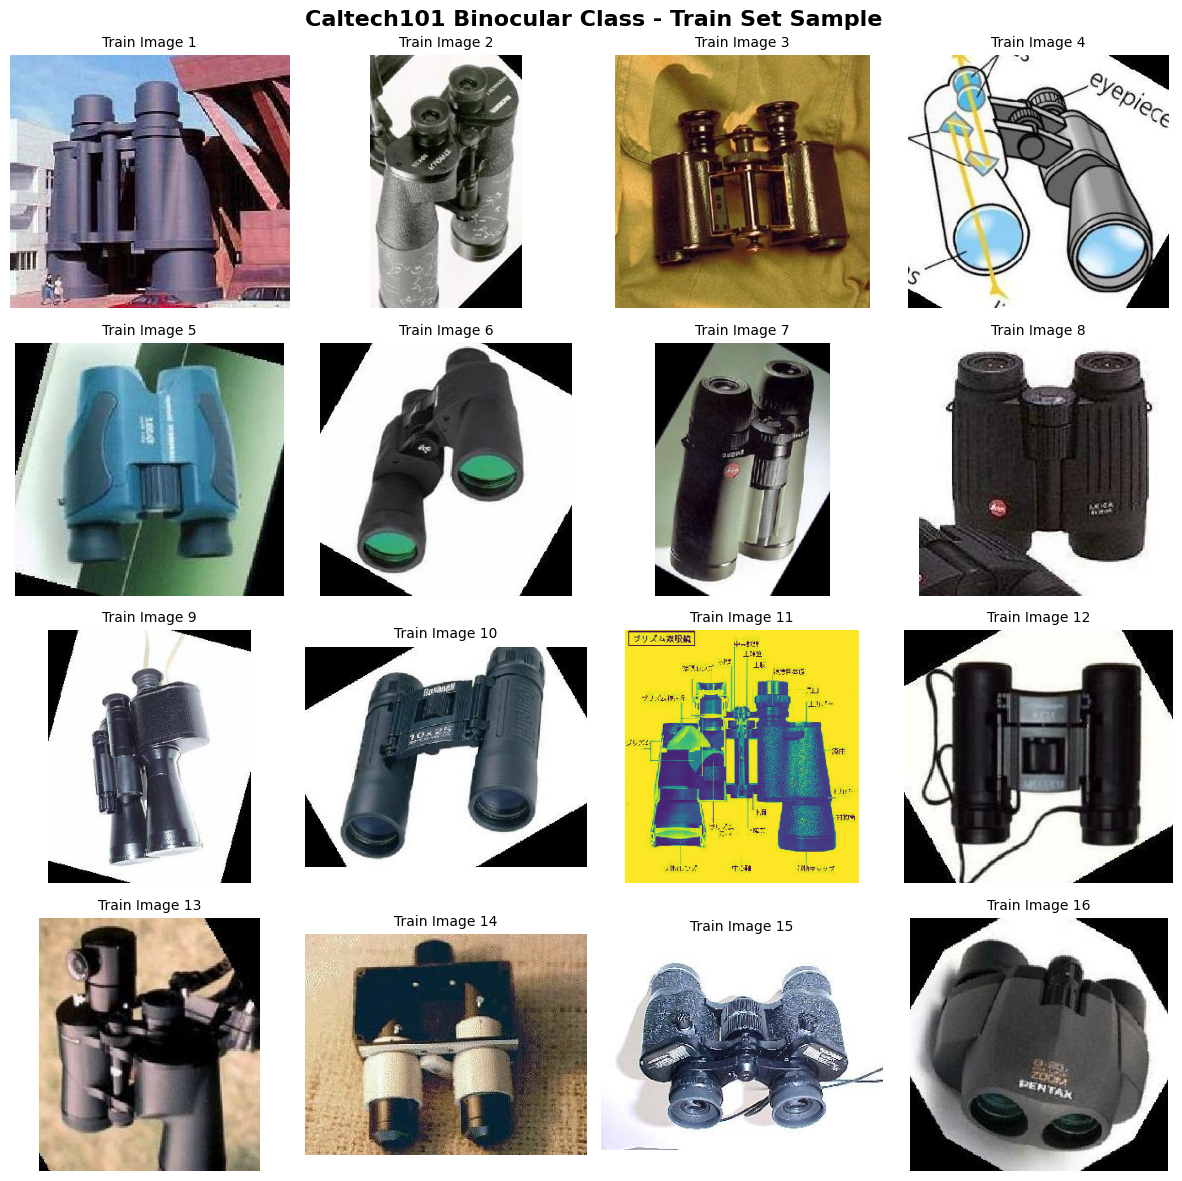

Total binocular images in train set: 24
Displaying first 16 images in 4x4 grid
Dataset indices shown: [2954, 2962, 2960, 2985, 2969, 2975, 2976, 2986, 2958, 2963, 2956, 2955, 2977, 2970, 2973, 2983]


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import torch
import torchvision
from torch.utils.data import random_split

# Load the full Caltech101 dataset to get proper splits
dataset = torchvision.datasets.Caltech101(root="datasets/caltech101")

# Split the dataset using the same logic as in the project (80% train, 10% val, 10% test)
split = (0.8, 0.1, 0.1)
train, val, test = random_split(
    dataset, split, generator=torch.Generator().manual_seed(42)
)

# Get all binocular images from the train set
binocular_class_idx = dataset.categories.index("binocular")
train_binocular_indices = []

for idx in train.indices:
    image, target = dataset[idx]
    if target == binocular_class_idx:
        train_binocular_indices.append(idx)

print(f"Found {len(train_binocular_indices)} binocular images in train set")

# Select up to 16 images for the 4x4 grid
num_images_to_show = min(16, len(train_binocular_indices))
selected_indices = train_binocular_indices[:num_images_to_show]

# Use fixed 4x4 grid
grid_rows = 4
grid_cols = 4

# Create subplot
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(12, 12))
fig.suptitle(
    "Caltech101 Binocular Class - Train Set Sample", fontsize=16, fontweight="bold"
)

# Load and display images
for i, dataset_idx in enumerate(selected_indices):
    if i >= grid_rows * grid_cols:
        break

    row = i // grid_cols
    col = i % grid_cols

    # Load image from dataset
    image, target = dataset[dataset_idx]

    # Display image
    ax = axes[row, col]
    ax.imshow(image)
    ax.set_title(f"Train Image {i+1}", fontsize=10)
    ax.axis("off")

# Hide unused subplots if we have fewer images than grid spaces
for i in range(num_images_to_show, grid_rows * grid_cols):
    row = i // grid_cols
    col = i % grid_cols
    axes[row, col].axis("off")
    axes[row, col].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Print information about the train set
print(f"Total binocular images in train set: {len(train_binocular_indices)}")
print(f"Displaying first {num_images_to_show} images in {grid_rows}x{grid_cols} grid")
print(f"Dataset indices shown: {selected_indices}")